In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [236]:
df1=pd.read_csv('absortion.csv')
#df1

In [237]:
df2 = pd.read_csv('absorption.txt')
#df2

In [238]:
df= pd.concat([df1, df2], axis=1)
df.drop('target', axis=1, inplace=True)

In [239]:
def extract_mutation_info(name):
    matches = re.findall(r'([A-Z])(\d+)([A-Z]+)', name)
    if matches:
        origins, positions, mutations = [], [], []
        for match in matches:
            origin, position, mutation = match
            origins.append(origin)
            positions.append(int(position))
            mutations.append(mutation)
        return origins, positions, mutations
    else:
        return None, None, None
df['origin'], df['position'], df['mutation'] = zip(*df['name'].apply(extract_mutation_info))

In [240]:
category=[]
for i in range(len(df)):
    value_check=df["peak"][i]

    if value_check>=539:
        category.append("1")
    else:
        category.append("0")
df["cat"]=category
df

,id,sequence,name,sequence,peak,is_train,m,origin,position,mutation,cat
0,sequence_40826,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,parent,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,539,True,0,None,None,None,1
1,sequence_40787,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122A,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,True,1,[W],[122],[A],0
2,sequence_40789,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122G,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,True,1,[W],[122],[G],0
3,sequence_40794,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122R,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,519,True,1,[W],[122],[R],0
4,sequence_40806,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,V126A,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,525,True,1,[V],[126],[A],0
...,...,...,...,...,...,...,...,...,...,...,...
76,sequence_40795,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/W222M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,562,True,2,"[T, W]","[125, 222]","[C, M]",1
77,sequence_40866,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,D121E/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,620,False,3,"[D, T, A]","[121, 125, 256]","[E, C, M]",1
78,sequence_40799,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/F185T/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,597,False,3,"[T, F, A]","[125, 185, 256]","[C, T, M]",1
79,sequence_40788,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122G/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,False,3,"[W, T, A]","[122, 125, 256]","[G, C, M]",0


In [241]:
df["cat"].value_counts()

cat
0    50
1    31
Name: count, dtype: int64

In [242]:
df

,id,sequence,name,sequence,peak,is_train,m,origin,position,mutation,cat
0,sequence_40826,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,parent,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,539,True,0,None,None,None,1
1,sequence_40787,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122A,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,True,1,[W],[122],[A],0
2,sequence_40789,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122G,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,True,1,[W],[122],[G],0
3,sequence_40794,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122R,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,519,True,1,[W],[122],[R],0
4,sequence_40806,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,V126A,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,525,True,1,[V],[126],[A],0
...,...,...,...,...,...,...,...,...,...,...,...
76,sequence_40795,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/W222M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,562,True,2,"[T, W]","[125, 222]","[C, M]",1
77,sequence_40866,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,D121E/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,620,False,3,"[D, T, A]","[121, 125, 256]","[E, C, M]",1
78,sequence_40799,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/F185T/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,597,False,3,"[T, F, A]","[125, 185, 256]","[C, T, M]",1
79,sequence_40788,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122G/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,False,3,"[W, T, A]","[122, 125, 256]","[G, C, M]",0


In [243]:
df_positive=df.loc[df["cat"]=="1"]
df_negative=df.loc[df["cat"]=="0"]
df_positive=df_positive.sort_values(by="peak",ascending=True)
df_negative=df_negative.sort_values(by="peak",ascending=True)
df_negative=df_negative.reset_index(drop=True)
df_positive=df_positive.reset_index(drop=True)

In [244]:
df_positive.head()

,id,sequence,name,sequence,peak,is_train,m,origin,position,mutation,cat
0,sequence_40826,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,parent,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,539,True,0,None,None,None,1
1,sequence_40820,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W222L,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,[W],[222],[L],1
2,sequence_40837,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,F185W,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,[F],[185],[W],1
3,sequence_40808,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,V126M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,[V],[126],[M],1
4,sequence_40836,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,F185T,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,[F],[185],[T],1


In [245]:
df_origin_positive=[]

for i in range(len(df_positive["origin"])):
    if df_positive["origin"][i]!=None:
        for j in range(len(df_positive["origin"][i])):
            letter=df_positive["origin"][i][j]
            df_origin_positive.append(letter)
df_origin_positive=pd.DataFrame(df_origin_positive)
df_origin_positive.columns=["letter"]
df_origin_positive
count_p=df_origin_positive.value_counts()

In [246]:
df_origin_negative=[]

for i in range(len(df_negative["origin"])):
    if df_negative["origin"][i]!=None:
        for j in range(len(df_negative["origin"][i])):
            letter=df_negative["origin"][i][j]
            df_origin_negative.append(letter)
df_origin_negative=pd.DataFrame(df_origin_negative)
df_origin_negative.columns=["letter"]
df_origin_negative
count_n=df_origin_negative.value_counts()

KeyError: 'count'

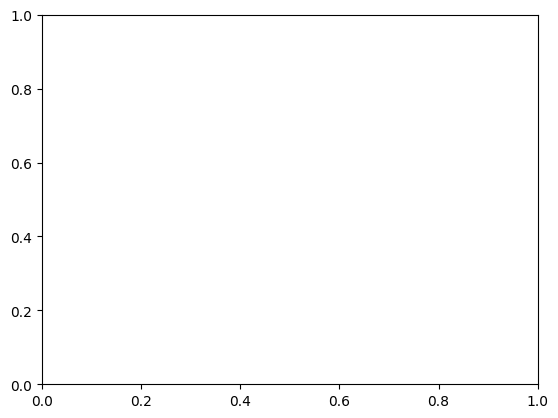

In [254]:
negative_value_counts = df_origin_negative['letter'].value_counts()

# Crear un nuevo DataFrame a partir de las cuentas
df_negative_counts = pd.DataFrame({'letter': negative_value_counts.index, 'count': negative_value_counts.values})

# Ahora, puedes trazar un gráfico de dispersión
df_origin_positive.plot(x='letter', y='count', kind='scatter', color='blue')

# Muestra el gráfico
plt.show()

KeyError: 'df_origin_negative.value_counts()'

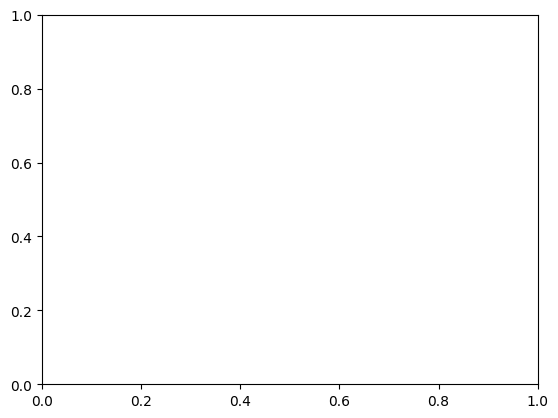

In [252]:
df_origin_positive.plot(x="letter",y="df_origin_negative.value_counts()",kind="scatter",color="blue")

In [ ]:
def caracterization(name,det):
    arr=[]
    for i in range(len(df[name])):
        if df[name][i]!=None:
            for j in range(len(df[name][i])):
                letter=df[name][i][j]
                arr.append(letter)
    if(det==1):
        df_origin=pd.DataFrame(arr)
        df_origin.columns=["letter"]
        df_origin
    if(det==2):
        df_mutation=pd.DataFrame(arr)
        df_mutation.columns=["letter"]
        df_mutation

In [ ]:
caracterization("mutation",2)

In [ ]:
df_origin

,letter
0,W
1,W
2,W
3,V
4,V
...,...
140,A
141,D
142,T
143,F


<Axes: xlabel='name', ylabel='peak'>

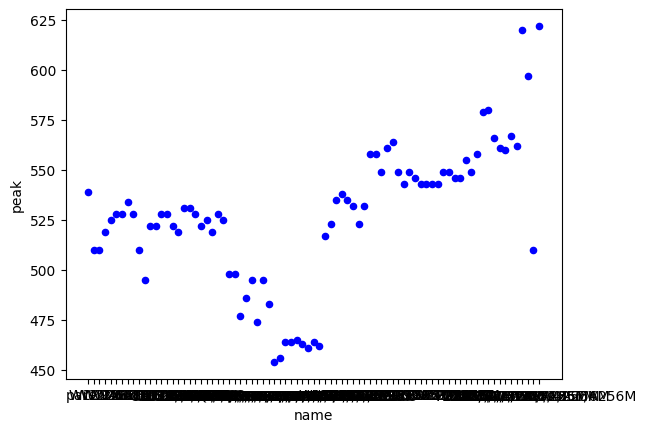

In [ ]:
df.plot(x="name",y="peak",kind="scatter",color="blue")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        81 non-null     object
 1   sequence  81 non-null     object
 2   name      81 non-null     object
 3   sequence  81 non-null     object
 4   peak      81 non-null     int64 
 5   is_train  81 non-null     bool  
 6   m         81 non-null     int64 
 7   cat       81 non-null     object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.6+ KB
